In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('Titanic.csv', encoding='latin-1', sep=',')
# Como el archivo original está en inglés, queremos traducirlo al español
#Primero cambiamos los encabezados de las columnas
df = df.rename(columns={'PassengerId': 'ID_pasajero', 'Survived':'Supervivencia', 'Pclass':'Clase', 'Name':'Nombre', 'Sex':'Sexo', 'Age':'Edad', 'SibSp':'HerEsp', 'Parch':'PadHij', 'Fare':'Tarifa', 'Cabin':'Cabina','Embarked':'Embarque'})
# Luego reemplazamos 'female' por 'femenino' y 'male' por 'masculino' en la columna 'Sexo'
df['Sexo'] = df['Sexo'].replace({'female': 'femenino', 'male': 'masculino'})
# Finalmente, para trabajar sobre un nuevo archivo traducido, sin tocar el original,
# guardamos el DataFrame modificado en un nuevo archivo CSV
df.to_csv('titanic_traducido.csv', index=False)

In [3]:
df = pd.read_csv('titanic_traducido.csv', encoding='latin-1', sep=',')
df

,ID_pasajero,Supervivencia,Clase,Nombre,Sexo,Edad,HerEsp,PadHij,Ticket,Tarifa,Cabina,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femenino,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",femenino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",femenino,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",masculino,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",masculino,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",femenino,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",femenino,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",masculino,26.0,0,0,111369,30.0000,C148,C


In [4]:

for index, row in df.iterrows():
        id_pasajero = row['ID_pasajero']
        supervivencia = row['Supervivencia']
        clase = row['Clase']
        nombre = row['Nombre']
        sexo = row['Sexo']
        edad = row['Edad']
        hermanos_esposos = row['HerEsp']
        padres_hijos = row['PadHij']
        ticket = row['Ticket']
        tarifa = row['Tarifa']
        cabina = row['Cabina']
        embarque = row['Embarque']


# Puedes agregar relaciones (bordes) entre pasajeros aquí si es necesario

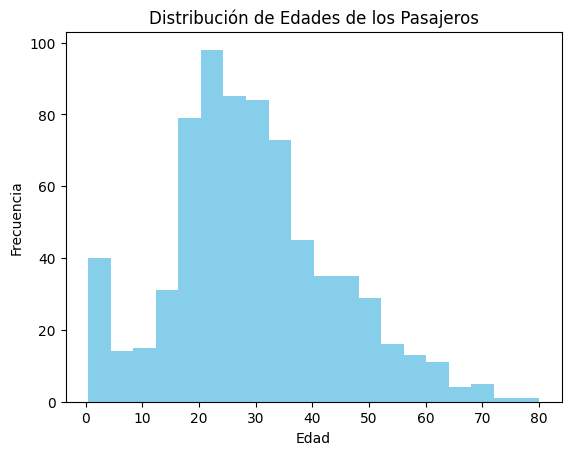

In [5]:
# Supongamos que 'df' es tu DataFrame
plt.hist(df['Edad'].dropna(), bins=20, color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de los Pasajeros')
plt.show()


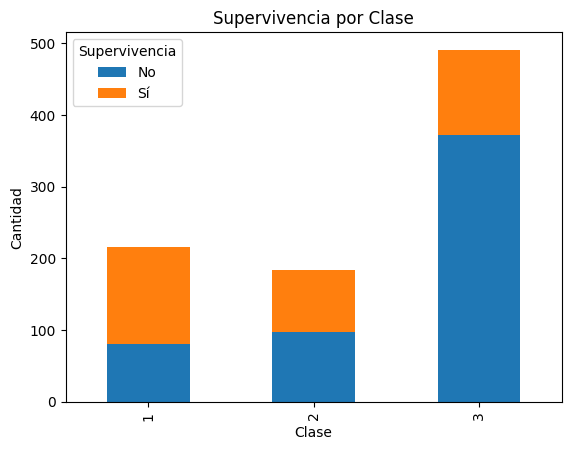

In [6]:
# Supongamos que 'df' es tu DataFrame
survival_by_class = df.groupby('Clase')['Supervivencia'].value_counts().unstack()
survival_by_class.plot(kind='bar', stacked=True)
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Supervivencia por Clase')
plt.legend(title='Supervivencia', labels=['No', 'Sí'])
plt.show()

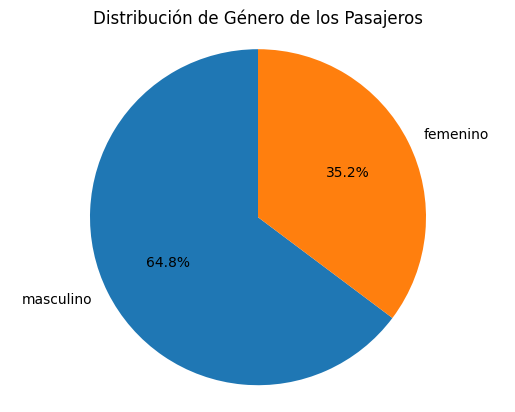

In [7]:
# Supongamos que 'df' es tu DataFrame
gender_counts = df['Sexo'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribución de Género de los Pasajeros')
plt.show()

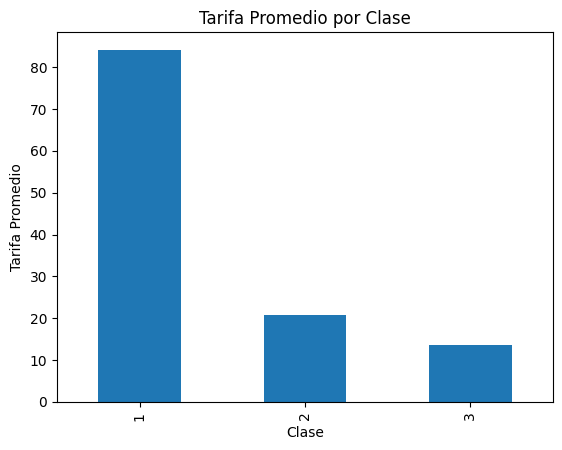

In [8]:
# Supongamos que 'df' es tu DataFrame
fare_by_class = df.groupby('Clase')['Tarifa'].mean()
fare_by_class.plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('Tarifa Promedio')
plt.title('Tarifa Promedio por Clase')
plt.show()